# LISTA 1

## CZĘŚĆ 1

3.12.8

In [3]:
import pandas as pd

df = pd.read_csv('ankieta.csv', encoding='Latin2', sep=";")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DZIAŁ     200 non-null    object
 1   STAŻ      200 non-null    int64 
 2   CZY_KIER  200 non-null    object
 3   PYT_1     200 non-null    int64 
 4   PYT_2     200 non-null    int64 
 5   PYT_3     200 non-null    int64 
 6   PŁEĆ      200 non-null    object
 7   WIEK      200 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 12.6+ KB


In [5]:
df.loc[df['WIEK'] <= 35, 'WIEK_KAT'] = '< 36'
df.loc[(df['WIEK'] >= 36) & (df['WIEK'] <= 45), 'WIEK_KAT'] = 'od 36 do 45'
df.loc[(df['WIEK'] >= 46) & (df['WIEK'] <= 55), 'WIEK_KAT'] = 'od 46 do 55'
df.loc[df['WIEK'] > 55, 'WIEK_KAT'] = '55 <'

In [6]:
df

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT
0,IT,2,Nie,1,-2,1,M,64,55 <
1,IT,2,Nie,0,-2,-2,M,67,55 <
2,IT,2,Nie,1,2,2,M,65,55 <
3,IT,2,Nie,-1,-2,-2,K,68,55 <
4,IT,3,Tak,1,2,-1,K,65,55 <
...,...,...,...,...,...,...,...,...,...
195,HR,2,Nie,1,2,2,M,42,od 36 do 45
196,HR,2,Nie,1,-1,-1,K,35,< 36
197,HR,2,Nie,-1,-2,-2,K,39,od 36 do 45
198,HR,2,Nie,1,2,1,K,48,od 46 do 55


In [7]:
table_dzial = df['DZIAŁ'].value_counts()
print(table_dzial)


DZIAŁ
PD    98
MK    45
HR    31
IT    26
Name: count, dtype: int64


In [8]:
table_staz = df['STAŻ'].value_counts()
print(table_staz)


STAŻ
2    140
1     41
3     19
Name: count, dtype: int64


In [9]:
table_czykier = df['CZY_KIER'].value_counts()
print(table_czykier)


CZY_KIER
Nie    173
Tak     27
Name: count, dtype: int64


In [10]:
table_plec = df['PŁEĆ'].value_counts()
print(table_plec)


PŁEĆ
M    129
K     71
Name: count, dtype: int64


In [11]:
table_wiekkat = df['WIEK_KAT'].value_counts()
print(table_wiekkat)


WIEK_KAT
od 36 do 45    104
od 46 do 55     45
< 36            26
55 <            25
Name: count, dtype: int64


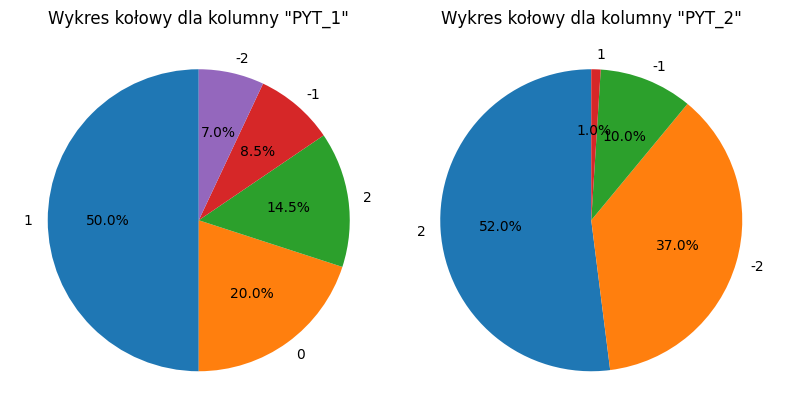

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))

table_pyt1 = df['PYT_1'].value_counts()
table_pyt2 = df['PYT_2'].value_counts()

plt.subplot(1,2,1)
plt.pie(table_pyt1, labels=table_pyt1.index, autopct='%1.1f%%', startangle=90)
plt.title('Wykres kołowy dla kolumny "PYT_1"')

plt.subplot(1,2,2)
plt.pie(table_pyt2, labels=table_pyt2.index, autopct='%1.1f%%', startangle=90)
plt.title('Wykres kołowy dla kolumny "PYT_2"')

plt.tight_layout()
plt.show()



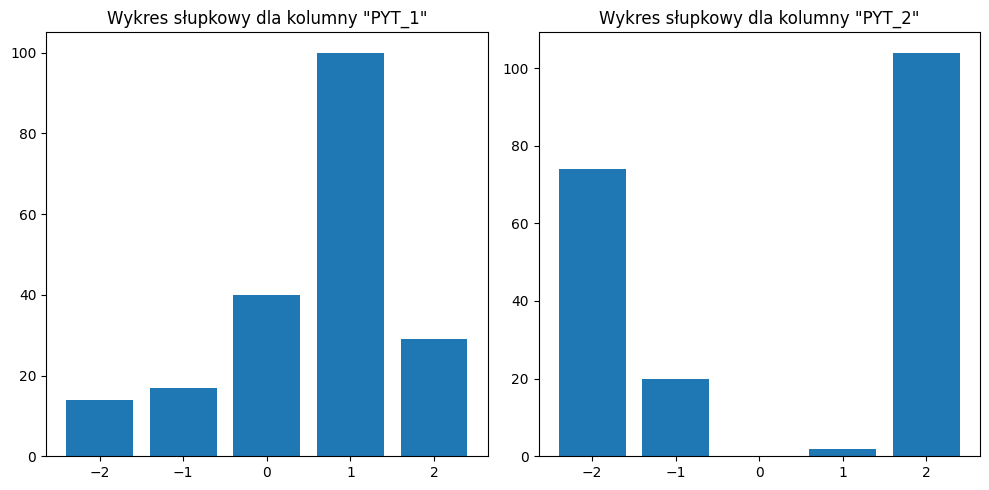

In [13]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.bar(table_pyt1.index, table_pyt1)
plt.title('Wykres słupkowy dla kolumny "PYT_1"')

plt.subplot(1,2,2)
plt.bar(table_pyt2.index, table_pyt2)
plt.title('Wykres słupkowy dla kolumny "PYT_2"')

plt.tight_layout()
plt.show()

In [14]:
crosstab1 = pd.crosstab(df['PYT_1'], 
                            df['DZIAŁ'],  
                               margins = False) 
crosstab1

DZIAŁ,HR,IT,MK,PD
PYT_1,,,,
-2,2,0,3,9
-1,2,2,3,10
0,5,4,14,17
1,19,15,15,51
2,3,5,10,11


In [15]:
crosstab2 = pd.crosstab(df['PYT_1'], 
                            df['STAŻ'],  
                               margins = False) 
crosstab2

STAŻ,1,2,3
PYT_1,,,
-2,5,5,4
-1,6,10,1
0,8,26,6
1,19,75,6
2,3,24,2


In [16]:
crosstab3 = pd.crosstab(df['PYT_1'], 
                            df['CZY_KIER'],  
                               margins = False) 
crosstab3 

CZY_KIER,Nie,Tak
PYT_1,,
-2,10,4
-1,14,3
0,34,6
1,88,12
2,27,2


In [17]:
crosstab4 = pd.crosstab(df['PYT_1'], 
                            df['PŁEĆ'],  
                               margins = False) 
crosstab4

PŁEĆ,K,M
PYT_1,,
-2,3,11
-1,7,10
0,14,26
1,36,64
2,11,18


In [18]:
crosstab5 = pd.crosstab(df['PYT_1'], 
                            df['WIEK_KAT'],  
                               margins = False) 
crosstab5

WIEK_KAT,55 <,< 36,od 36 do 45,od 46 do 55
PYT_1,,,,
-2,0,1,11,2
-1,3,6,7,1
0,8,3,24,5
1,12,13,50,25
2,2,3,12,12


In [19]:
crosstab6 = pd.crosstab(df['PYT_1'], 
                            df['PYT_2'],  
                               margins = False) 
crosstab6

PYT_2,-2,-1,1,2
PYT_1,,,,
-2,13,0,1,0
-1,16,0,0,1
0,39,0,1,0
1,3,17,0,80
2,3,3,0,23


In [20]:
df.loc[df['PYT_2'] <= -1, 'CZY_ZADOW'] = 'NIE'
df.loc[df['PYT_2'] >= 1, 'CZY_ZADOW'] = 'TAK'

df

,DZIAŁ,STAŻ,CZY_KIER,PYT_1,PYT_2,PYT_3,PŁEĆ,WIEK,WIEK_KAT,CZY_ZADOW
0,IT,2,Nie,1,-2,1,M,64,55 <,NIE
1,IT,2,Nie,0,-2,-2,M,67,55 <,NIE
2,IT,2,Nie,1,2,2,M,65,55 <,TAK
3,IT,2,Nie,-1,-2,-2,K,68,55 <,NIE
4,IT,3,Tak,1,2,-1,K,65,55 <,TAK
...,...,...,...,...,...,...,...,...,...,...
195,HR,2,Nie,1,2,2,M,42,od 36 do 45,TAK
196,HR,2,Nie,1,-1,-1,K,35,< 36,NIE
197,HR,2,Nie,-1,-2,-2,K,39,od 36 do 45,NIE
198,HR,2,Nie,1,2,1,K,48,od 46 do 55,TAK


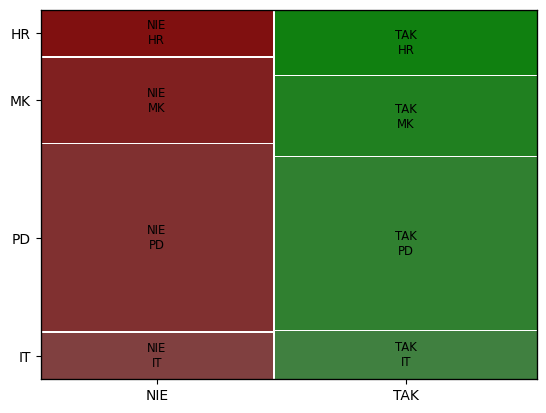

In [21]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['CZY_ZADOW', 'DZIAŁ'])
plt.show()

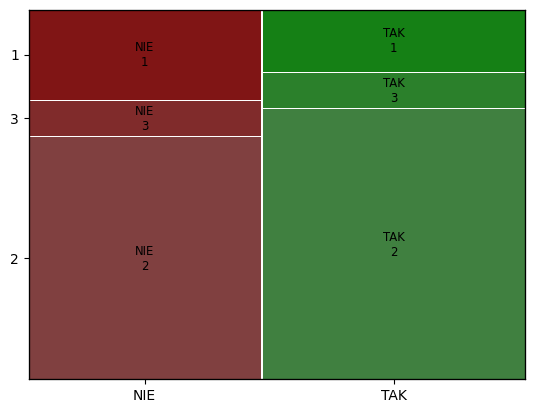

In [22]:
mosaic(df, ['CZY_ZADOW', 'STAŻ'])
plt.show()

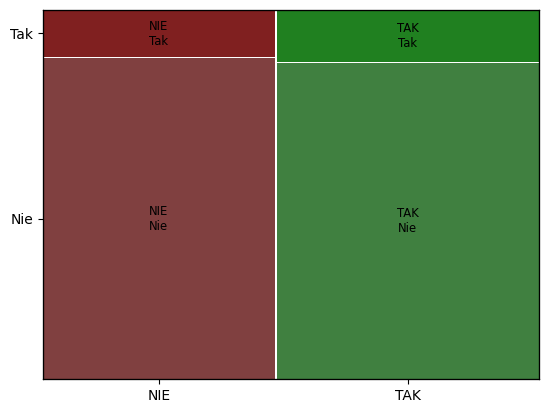

In [23]:
mosaic(df, ['CZY_ZADOW', 'CZY_KIER'])
plt.show()

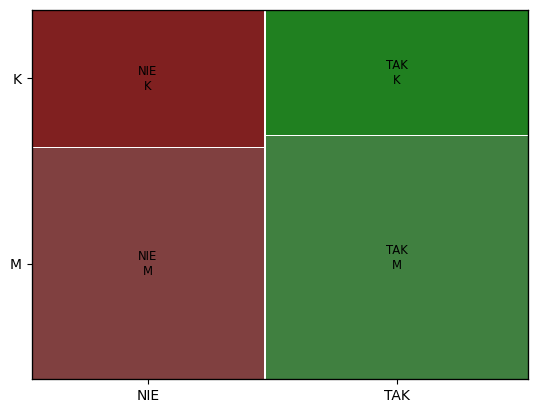

In [24]:
mosaic(df, ['CZY_ZADOW', 'PŁEĆ'])
plt.show()

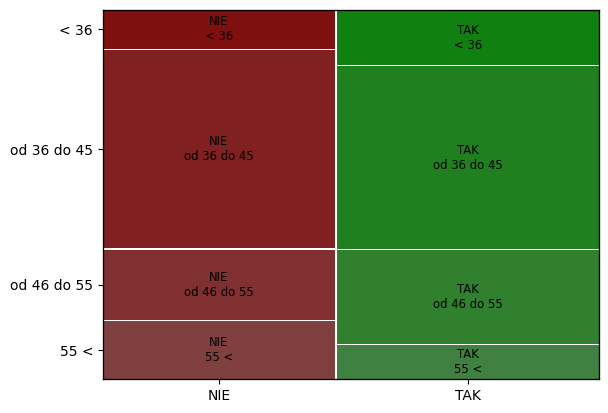

In [25]:
mosaic(df, ['CZY_ZADOW', 'WIEK_KAT'])
plt.show()

# CZĘŚĆ II

# ZAD 1

In [26]:
pd.DataFrame(table_pyt1).sort_values("PYT_1").transpose()


PYT_1,-2,-1,0,1,2
count,14,17,40,100,29


In [27]:

from plot_likert import plot_likert
df_pivot = df.pivot_table(index="CZY_KIER", columns="PYT_1", aggfunc="size", fill_value=0)
df_pivot

PYT_1,-2,-1,0,1,2
CZY_KIER,,,,,
Nie,10,14,34,88,27
Tak,4,3,6,12,2


# ZAD 2

/Users/karolcieslik/Documents/VS/.conda/lib/python3.12/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
/Users/karolcieslik/Documents/VS/.conda/lib/python3.12/site-packages/plot_likert/plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


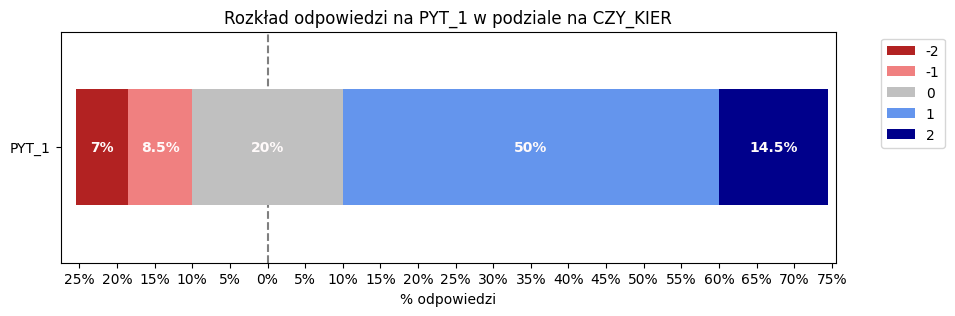

In [28]:
import plot_likert
scale = ['-2', '-1', '0', '1', '2']
ax = plot_likert.plot_likert(df['PYT_1'].astype(str), scale, plot_percentage=True, figsize=(10,3),
                        bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral)
plt.title('Rozkład odpowiedzi na PYT_1 w podziale na CZY_KIER')

ax.xaxis.set_label_text('% odpowiedzi')
plt.show()

/Users/karolcieslik/Documents/VS/.conda/lib/python3.12/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
/Users/karolcieslik/Documents/VS/.conda/lib/python3.12/site-packages/plot_likert/plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


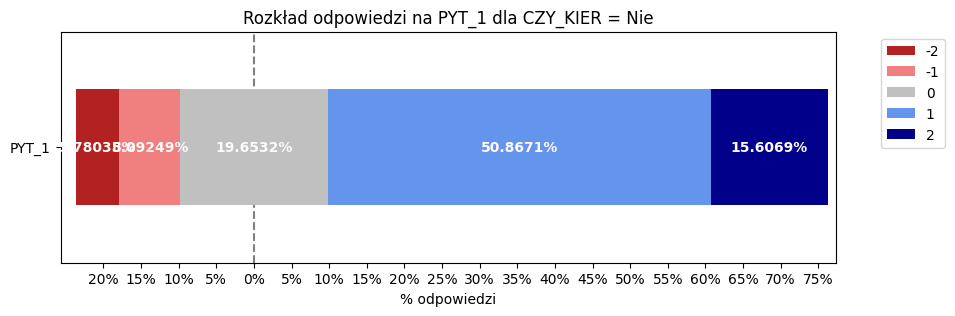

In [29]:
df_czy_kier_tak = df[df['CZY_KIER'] == "Nie"]

ax = plot_likert.plot_likert(df_czy_kier_tak['PYT_1'].astype(str), scale, plot_percentage=True, figsize=(10,3),
                        bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral)
plt.title('Rozkład odpowiedzi na PYT_1 dla CZY_KIER = Nie')

ax.xaxis.set_label_text('% odpowiedzi')
plt.show()

/Users/karolcieslik/Documents/VS/.conda/lib/python3.12/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
/Users/karolcieslik/Documents/VS/.conda/lib/python3.12/site-packages/plot_likert/plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


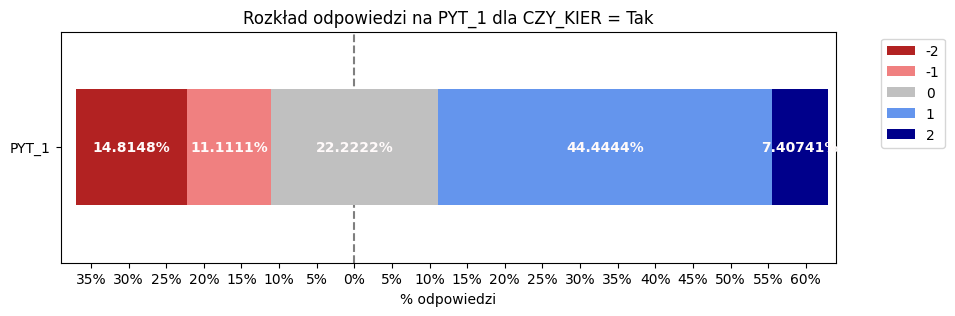

In [30]:
df_czy_kier_tak = df[df['CZY_KIER'] == "Tak"]

ax = plot_likert.plot_likert(df_czy_kier_tak['PYT_1'].astype(str), scale, plot_percentage=True, figsize=(10,3),
                        bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral)
plt.title('Rozkład odpowiedzi na PYT_1 dla CZY_KIER = Tak')

ax.xaxis.set_label_text('% odpowiedzi')
plt.show()

# ZAD 3

In [31]:
import numpy as np

sample_size = int(len(df) * 0.1)

indices_without_replacement = np.random.choice(df.index, size=sample_size, replace=False)
sample_without_replacement = df.loc[indices_without_replacement]

indices_with_replacement = np.random.choice(df.index, size=sample_size, replace=True)
sample_with_replacement = df.loc[indices_with_replacement]

print(f"Liczba wierszy w oryginalnym zbiorze: {len(df)}. Unikalnych: {len(df.drop_duplicates())}")
print("")
print(f"Liczba wierszy w próbie bez zwracania: {len(sample_without_replacement)}")
print(f"Liczba unikalnych wierszy w próbie bez zwracania: {len(sample_without_replacement.drop_duplicates())}")
print("")
print(f"Liczba wierszy w próbie ze zwracaniem: {len(sample_with_replacement)}")
print(f"Liczba unikalnych wierszy w próbie ze zwracaniem: {len(sample_with_replacement.drop_duplicates())}")

Liczba wierszy w oryginalnym zbiorze: 200. Unikalnych: 188

Liczba wierszy w próbie bez zwracania: 20
Liczba unikalnych wierszy w próbie bez zwracania: 20

Liczba wierszy w próbie ze zwracaniem: 20
Liczba unikalnych wierszy w próbie ze zwracaniem: 20


# ZAD 4

In [32]:
def function_1(n, p):
    random_numbers = np.random.uniform(0, 1, n)
    results = ["0" if x < p else "1" for x in random_numbers]
    count_ones = results.count("1")
    
    return count_ones

n = 100
p = 0.5

function_1(n, p)


59

In [33]:
def function_2(n, p, N):
    # Tworzymy wektor długości N wypełniony zerami
    success_counts = np.zeros(N, dtype=int)
    
    # Wykonujemy function_1 N razy
    for i in range(N):
        success_counts[i] = function_1(n, p)
    
    return success_counts

n = 1000
p = 0.5
N = 40

function_2(n, p, N)

array([510, 480, 499, 511, 524, 499, 508, 507, 496, 485, 467, 498, 487,
       491, 502, 492, 522, 517, 494, 486, 493, 513, 484, 514, 512, 529,
       483, 491, 486, 494, 495, 498, 500, 500, 524, 492, 508, 512, 488,
       510])

In [34]:
W = function_2(n, p, N)
x = sum(W)

E_theoretical = n * p
Var_theoretical = n * p * (1 - p)

E_empirical = np.mean(W)
Var_empirical = np.var(W)

print(f"Teoretyczna wartość oczekiwana (E): {E_theoretical}")
print(f"Empiryczna wartość oczekiwana (E): {E_empirical}")

print(f"Teoretyczna wariancja (Var): {Var_theoretical}")
print(f"Empiryczna wariancja (Var): {Var_empirical}")

Teoretyczna wartość oczekiwana (E): 500.0
Empiryczna wartość oczekiwana (E): 499.4
Teoretyczna wariancja (Var): 250.0
Empiryczna wariancja (Var): 202.34000000000003


# ZAD 5

In [35]:
import bisect
def func1(n,ps,x):
    random_numbers = np.random.uniform(0, 1, n)
    cum_prob = np.cumsum(ps)
    result = np.zeros(len(x))
    for num in random_numbers:
        idx = bisect.bisect(cum_prob, num)
        result[idx] += 1
    
    return result

n = 100
p = [0.3,0.3,0.4]
x = [0,1,2]

func1(n, p, x)

array([30., 31., 39.])

In [36]:
def func2(n, p, N, x):
    success_counts = np.zeros((N, len(x))) 

    for i in range(N):
        success_counts[i] = func1(n, p, x)
    
    return success_counts

n = 100
p = [0.3,0.3,0.4]
x = [0,1,2]
N = 1000

func2(n, p, N, x)

array([[27., 27., 46.],
       [28., 34., 38.],
       [37., 31., 32.],
       ...,
       [26., 21., 53.],
       [32., 25., 43.],
       [26., 29., 45.]], shape=(1000, 3))

In [37]:
sample = func2(n,p,N,x)
E_teo_multinom = [n * p_ for p_ in p]
E_emp_multinom = np.mean(sample, axis=0)


In [38]:
print(f"Teoretyczna wartość oczekiwana (E): {E_teo_multinom}")
print(f"Empiryczna wartość oczekiwana (E): {E_emp_multinom}")

Teoretyczna wartość oczekiwana (E): [30.0, 30.0, 40.0]
Empiryczna wartość oczekiwana (E): [30.101 30.232 39.667]


"wyznaczamy realizację przedziału ufności"


# ZAD 6


In [39]:
from scipy.stats import beta


def clopper_pearson(alfa, sukces=0, proba=0, dane=[]):
    if (len(dane) > 0):
        sukces = np.sum(dane)
        proba = len(dane)

    lower_bound = beta.ppf(alfa / 2, sukces, proba - sukces + 1)
    upper_bound = beta.ppf(1 - alfa / 2, sukces + 1, proba - sukces)

    return lower_bound, upper_bound

Przykład użycia

In [40]:

alfa = 0.05
sukcesy = 30
proby = 100

przedzial = clopper_pearson(alfa, sukcesy, proby)
przedzial

(np.float64(0.2124064204895366), np.float64(0.39981467617980426))

In [41]:
dane_przykladowe = np.random.choice([0, 1], size=100, p=[0.7, 0.3])

przedzial = clopper_pearson(alfa, dane=dane_przykladowe)
przedzial

(np.float64(0.18606642229074064), np.float64(0.3680162729089749))

# ZAD 7

In [42]:
df.loc[df['PYT_2'] <= -1, 'CZY_ZADW'] = 0
df.loc[df['PYT_2'] >= 1, 'CZY_ZADW'] = 1

df.loc[df['PYT_3'] <= -1, 'CZY_ZADW_2'] = 0
df.loc[df['PYT_3'] >= 1, 'CZY_ZADW_2'] = 1

print(df[['PYT_2', 'PYT_3', 'CZY_ZADW', 'CZY_ZADW_2']].head())

   PYT_2  PYT_3  CZY_ZADW  CZY_ZADW_2
0     -2      1       0.0         1.0
1     -2     -2       0.0         0.0
2      2      2       1.0         1.0
3     -2     -2       0.0         0.0
4      2     -1       1.0         0.0


In [43]:
alfa = 0.05  

przedzial_pyt_2 = clopper_pearson(alfa, dane=df["CZY_ZADW"])
przedzial_pyt_3 = clopper_pearson(alfa, dane=df["CZY_ZADW_2"])

In [44]:
przedzial_pyt_2

(np.float64(0.45833050041147494), np.float64(0.6007670588028856))

In [45]:
przedzial_pyt_3

(np.float64(0.5184215852127789), np.float64(0.6588693543285322))

# ZAD 8

Rozkład dwumianowy $B(n,p)$ modeluje liczbę sukcesów w $n$ niezależnych próbach Bernoulliego, gdzie prawdopodobieństwo sukcesu wynosi $p$.

W Pythonie generujemy wartości z tego rozkładu za pomocą funkcji `np.random.binomial(n, p, size)` z biblioteki NumPy

```python
np.random.binomial(n, p, size=None)
```

Funkcja przyjmuje następujące argumenty:
- $n$: liczba prób (np. liczba rzutów monetą),
- $p$: prawdopodobieństwo sukcesu w jednej próbie,
- $size$: liczba generowanych wartości (np. symulacje).

Przykład realizacji jednej wartości

In [64]:
wynik_1 = np.random.binomial(n=10, p=0.5)
print(f"Wynik pojedynczej symulacji: {wynik_1}")

Wynik pojedynczej symulacji: 5


Przykład dla wielu realizacji; średnia powinna być bliska $EX$, czyli $10 * 0.5 = 5$

In [ ]:
wyniki_1000 = np.random.binomial(n=10, p=0.5, size=1000)

print(f"Średnia liczba sukcesów w 1000 eksperymentach: {np.mean(wyniki_1000)}")

Średnia liczba sukcesów w 1000 eksperymentach: 4.916


Przedział ufności dla parametru p rozkładu dwumianowego możemy wyznaczyć za pomocą metody proportion_confint(k, n, method='binom_test', alpha) z modułu statsmodels.stats.propotion.

Argumenty:

 - liczba sukcesów
 - liczba prób
 - rozważany rozkład, w naszym przypadku dwumianowy (binom_test)
 - poziom ufności

In [66]:
from statsmodels.stats.proportion import proportion_confint

In [77]:
przedzial_ufnosci = proportion_confint(wynik_1, 10, 0.05,"binom_test")

print(f"Przedział ufności dla próbki z B(10, 0.5) na poziomie ufności α = 0.05:\n I = {przedzial_ufnosci}")

Przedział ufności dla próbki z B(10, 0.5) na poziomie ufności α = 0.05:
 I = (0.2224411010076423, 0.7775588989919017)


# ZAD 9

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, binom

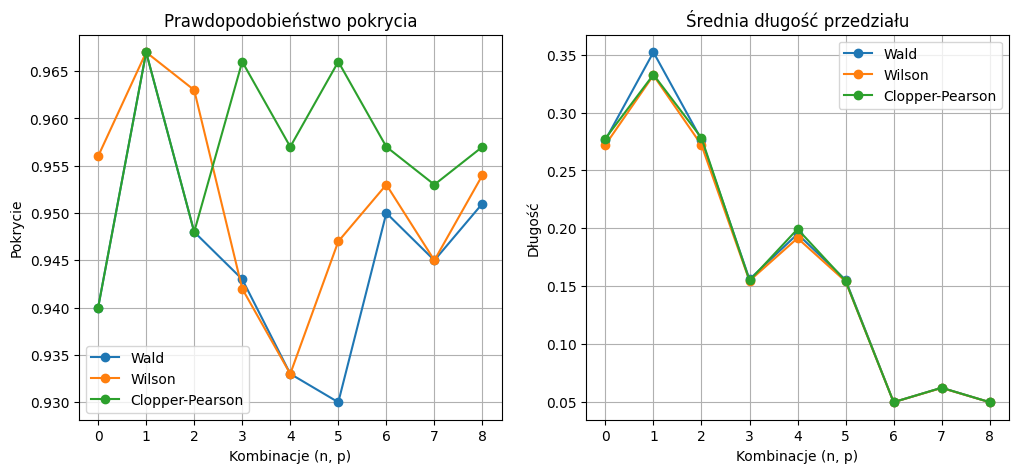

In [90]:


def wald(sample, alpha):
    n = len(sample)
    p_estim = np.mean(sample)
    se = np.sqrt(p_estim * (1 - p_estim) / n)
    margin = norm.ppf(1 - alpha / 2) * se
    return max(0, p_estim - margin), min(1, p_estim + margin)

def wilson(sample, alpha):
    n = len(sample)
    p_estim = np.mean(sample)
    q = norm.ppf(1 - alpha / 2)
    center = p_estim + (q**2 / (2 * n))
    denom = 1 + (q**2 / n)
    margin = q * np.sqrt((p_estim * (1 - p_estim) / n) + (q**2 / (4 * n**2)))
    return max(0, (center - margin) / denom), min(1, (center + margin) / denom)

def clopper_pearson(sample, alpha):
    n = len(sample)
    x = np.sum(sample)
    lower = binom.ppf(alpha / 2, n, x / n) / n if x > 0 else 0
    upper = binom.ppf(1 - alpha / 2, n, x / n) / n if x < n else 1
    return lower, upper

ns = [30, 100, 1000]
ps = [0.2, 0.5, 0.8]
alpha = 0.05
mc = 1000

coverage = {"Wald": [], "Wilson": [], "Clopper-Pearson": []}
lengths = {"Wald": [], "Wilson": [], "Clopper-Pearson": []}

for n in ns:
    for p in ps:
        wald_cover, wilson_cover, cp_cover = 0, 0, 0
        wald_len, wilson_len, cp_len = 0, 0, 0
        
        for _ in range(mc):
            sample = np.random.binomial(1, p, n)
            wald_ci = wald(sample, alpha)
            wilson_ci = wilson(sample, alpha)
            cp_ci = clopper_pearson(sample, alpha)
            
            wald_cover += wald_ci[0] <= p <= wald_ci[1]
            wilson_cover += wilson_ci[0] <= p <= wilson_ci[1]
            cp_cover += cp_ci[0] <= p <= cp_ci[1]
            
            wald_len += wald_ci[1] - wald_ci[0]
            wilson_len += wilson_ci[1] - wilson_ci[0]
            cp_len += cp_ci[1] - cp_ci[0]
        
        coverage["Wald"].append(wald_cover / mc)
        coverage["Wilson"].append(wilson_cover / mc)
        coverage["Clopper-Pearson"].append(cp_cover / mc)
        
        lengths["Wald"].append(wald_len / mc)
        lengths["Wilson"].append(wilson_len / mc)
        lengths["Clopper-Pearson"].append(cp_len / mc)

# Rysowanie wykresów
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Prawdopodobieństwo pokrycia
for method in coverage:
    ax[0].plot(range(len(coverage[method])), coverage[method], label=method, marker='o')
ax[0].set_title("Prawdopodobieństwo pokrycia")
ax[0].set_xlabel("Kombinacje (n, p)")
ax[0].set_ylabel("Pokrycie")
ax[0].legend()
ax[0].grid()

# Średnia długość przedziału
for method in lengths:
    ax[1].plot(range(len(lengths[method])), lengths[method], label=method, marker='o')
ax[1].set_title("Średnia długość przedziału")
ax[1].set_xlabel("Kombinacje (n, p)")
ax[1].set_ylabel("Długość")
ax[1].legend()
ax[1].grid()

plt.show()

# ZAD 10


In [94]:
import scipy.stats as stats
import statsmodels.stats.proportion as smp


In [95]:
def test_binomial_proportion(k, n, p0=0.5):
    """
    Wykonuje test dokładny (binomtest) i test asymptotyczny (proportions_ztest)
    dla proporcji sukcesów w rozkładzie dwumianowym.
    
    Parametry:
        k  - liczba sukcesów
        n  - liczba prób
        p0 - hipotezowane prawdopodobieństwo sukcesu (domyślnie 0.5)
    
    Zwraca:
        Słownik z wynikami testów
    """
    # Test dokładny (binomtest)
    binom_test = stats.binomtest(k, n, p=p0, alternative='two-sided')
    
    # Test asymptotyczny (Z-test dla proporcji)
    z_stat, p_value_ztest = smp.proportions_ztest(count=k, nobs=n, value=p0, alternative='two-sided')
    
    return {
        "binomtest_pvalue": binom_test.pvalue,
        "z_stat": z_stat,
        "ztest_pvalue": p_value_ztest
    }

In [ ]:

if __name__ == "__main__":
    k = 45   # liczba sukcesów
    n = 100  # liczba prób
    p0 = 0.5 # hipoteza zerowa
    
    results = test_binomial_proportion(k, n, p0)
    
    print("Wyniki testów:")
    print(f"Test dokładny (binomtest) - wartość p: {results['binomtest_pvalue']:.4f}")
    print(f"Test asymptotyczny (Z-test) - statystyka Z: {results['z_stat']:.4f}")
    print(f"Test asymptotyczny (Z-test) - wartość p: {results['ztest_pvalue']:.4f}")

Wyniki testów:
Test dokładny (binomtest) - wartość p: 0.3682
Test asymptotyczny (Z-test) - statystyka Z: -1.0050
Test asymptotyczny (Z-test) - wartość p: 0.3149


# Zad Dodatkowe

In [92]:
import numpy as np
import scipy.stats as stats

def logit_ci(x, n, alpha=0.05):
    """Oblicza asymptotyczny przedział ufności dla prawdopodobieństwa sukcesu za pomocą transformacji logit i metody delta."""
    # Estymator prawdopodobieństwa sukcesu
    p_hat = x / n
    
    # Transformacja logit
    theta_hat = np.log(p_hat / (1 - p_hat))
    
    # Odchylenie standardowe wg metody delta
    se_theta = np.sqrt(1 / (n * p_hat * (1 - p_hat)))
    
    # Kwartyl rozkładu normalnego
    z = stats.norm.ppf(1 - alpha / 2)
    
    # Granice przedziału ufności dla theta
    theta_lower = theta_hat - z * se_theta
    theta_upper = theta_hat + z * se_theta
    
    # Powrót do przestrzeni prawdopodobieństwa
    p_lower = np.exp(theta_lower) / (1 + np.exp(theta_lower))
    p_upper = np.exp(theta_upper) / (1 + np.exp(theta_upper))
    
    return p_lower, p_upper

# Porównanie z funkcją wbudowaną z statsmodels (Wilson)
def compare_with_statsmodels(x, n, alpha=0.05):
    import statsmodels.stats.proportion as smp
    
    p_lower_delta, p_upper_delta = logit_ci(x, n, alpha)
    p_lower_sm, p_upper_sm = smp.proportion_confint(x, n, alpha=alpha, method='wilson')
    
    return {'delta_method': (p_lower_delta, p_upper_delta), 'statsmodels_wilson': (p_lower_sm, p_upper_sm)}

# Przykładowe dane
test_x, test_n = 30, 100
print(compare_with_statsmodels(test_x, test_n))

{'delta_method': (np.float64(0.2184030369347906), np.float64(0.3966127925180066)), 'statsmodels_wilson': (0.21894885294932756, 0.39584854633346667)}
